$\def\del#1#2{\frac{\partial#1}{\partial#2}}$
$\def\d#1#2{\frac{\mathrm{d}#1}{\mathrm{d}#2}}$
$\def\VolInt#1{\int_{\mathsf{V}}#1\,\mathrm{d}\mathsf{V}}$
$\def\SurfInt#1{\int_{\mathsf{S}}#1\cdot\mathbf{a}\,\mathrm{d}\mathsf{S}}$

<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 4 Problem 3
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline including dismissal from the chemical engineering program and potentially from the university.

# Part 1

From the lecture notes, we have 
\begin{equation}
    x_{A}^{0} = x_{A}^{\infty} + \left( x_{A,0}^{0} - x_{A}^{\infty} \right) \exp\left( -\beta D_{AB} t \right), \label{eq:xa-bulb0}
\end{equation}
where
$$
    \beta \equiv \frac{ A_{c} }{ V_{0} L } \left( 1 + \frac{V_{0}}{V_{L}} \right).
$$
From an overall mole balance, we also know that 
\begin{equation}
    x_A^\infty = \frac{x_A^0 V_0 + x_A^L V_L}{V_0+V_L}.
    \label{eq:xainf}
\end{equation}

We are interested in solving \eqref{eq:xa-bulb0} for $t$. 
Doing so, we find 
\begin{equation}
    t = \frac{-1}{\beta D_{AB}} \ln\left[ \frac{ \left( x_{A}^{0} - x_{A}^{\infty} \right) }{ \left( x_{A,0}^{0} - x_{A}^{\infty} \right) } \right]. 
    \label{eq:t-bulb0}
\end{equation}
Similarly for the bulb at $z=L$ we have
\begin{align}
    x_{A}^{L}	&=	x_{A}^{\infty} \left( 1 + \frac{V_{0}}{V_{L}} \right) - \frac{V_{0}}{V_{L}} x_{A}^{0} \\
        &=	x_{A}^{\infty} + \frac{V_{0}}{V_{L}} \left( x_{A}^{\infty} - x_{A,0}^{0} \right) \exp\left( -\beta D_{AB} t \right) \label{eq:xaL}
\end{align}
which can be solved for $t$ to find
\begin{equation}
    t = \frac{-1}{\beta D_{AB}} \ln\left[ \frac{V_{L}}{V_{0}} \frac{x_{A}^{L} - x_{A}^{\infty}}{x_{A}^{\infty} - x_{A,0}^{0}} \right] 
    \label{eq:t-bulbL}
\end{equation}

In [1]:
import numpy as np

# denote A as argon, B as xenon
#
# Initially, bulb 0 contains argon and bulb L contains xenon

dbulb = 0.15            # bulb diameter, m
r     = 1e-3            # tube radius, m
L     = 0.1             # tube length, m
Dab   = 0.18 / 100**2   # diffusivity, m^2/s
Ac  = np.pi * r**2      # tube cross-sectional area

# bulb volumes
V0  = np.pi*4/3*(dbulb/2)**3 # left bulb volume, m^3
VL  = V0 # right bulb volume, m^3

β   = Ac/(V0*L) * (1+V0/VL)  # geometry factor

xa0_0 = 1  # initial argon in left  bulb
xaL_0 = 0  # initial argon in right bulb

# the equilibrium composition
xa_inf = (xa0_0*V0 + xaL_0*VL)/(V0+VL)

Using \eqref{eq:t-bulb0} and \eqref{eq:t-bulbL} with $x_A^0 = 0.7$ and $x_A^L = 0.25$, respectively, we find:

In [2]:
xa0 = 0.7
xaL = 0.25

tLeft   = -1/(β*Dab) * np.log( (xa0-xa_inf) / (xa0_0 - xa_inf))
tRight = -1/(β*Dab) * np.log( (xaL-xa_inf) / (xa_inf - xa0_0) * V0/VL)

print('For the left  bulb to reach xA={:.2f}, t = {:.0f} hours'.format(xa0,tLeft/60/60))
print('For the right bulb to reach xA={:.2f}, t = {:.0f} hours'.format(xaL,tRight/60/60))


For the left  bulb to reach xA=0.70, t = 398 hours
For the right bulb to reach xA=0.25, t = 301 hours


# Part 2

We are looking for $N_A$ and $N_B$ at $t=75$ hours.

Note that 
\begin{align*}
    N_{A} &= J_{A}, \\
    N_{B} &= J_{B}, \\
    N_{B} &=-N_{A}
\end{align*}
for this problem. 

From the lecture notes, 
\begin{equation}
    N_{A} = \frac{-c D_{AB}}{L}\left(x_{A}^{L} - x_{A}^{0}\right)
    \label{eq:species-molar-flux}
\end{equation}
We can find $x_A^0$ from \eqref{eq:xa-bulb0} and then $x_A^L$ from one of two ways:
  1. from rearranging \eqref{eq:xainf} to find: $$x_A^L = \frac{x_A^0(V_0+V_L) - x_A^0 V_0}{V_L}$$
  1. from \eqref{eq:xaL}
  
We can use the gas law to get $c=\frac{P}{RT}$.
Calculating numbers, we obtain:

In [3]:
p = 101325     # pressure, Pa
R = 8.314      # gas constant, J/mol/K
T = 105+273.15 # temperature, K
c = p/(R*T)

t = 75*3600   # time (s)
xa0 = xa_inf + (xa0_0 - xa_inf) * np.exp(-β*Dab * t)
xaL = xa_inf + V0/VL * (xa_inf - xa0_0) * np.exp(-β*Dab * t)

Na = -c*Dab/L*(xaL-xa0)
Nb = -Na

print('The molar flux of argon at t={:.0f} hours is {:.1f} mol/cm^2/s'.format(t/3600,Na*100**2) )
print('The molar flux of xenon at t={:.0f} hours is {:.1f} mol/cm^2/s'.format(t/3600,Nb*100**2) )

The molar flux of argon at t=75 hours is 48.8 mol/cm^2/s
The molar flux of xenon at t=75 hours is -48.8 mol/cm^2/s


# Part 3

We want to plot $v_A$ and $v_B$ at $t=75$ hours and report the value of $v_A$ and $v_B$ at $z=L$ at $t=100$ hours.

In terms of fluxes, we can compute species velocities as $$v_{i}=\frac{N_{i}}{c_{i}},$$ 

The mole fraction profiles are linear. 
This is easily shown by noting that $N_{A}=-cD_{AB}\d{x_{A}}{z}$ and that $N_{A}$, $c$ and $D_{AB}$ are all constant, which implies that $\d{x_{A}}{z}$ is constant, or $x_{A}(z)$ is linear. 

The figure below shows the species velocity profiles through the tube. Note that, although the species fluxes are constant, the velocities are not. This is because the mole fraction profiles are not constant. 

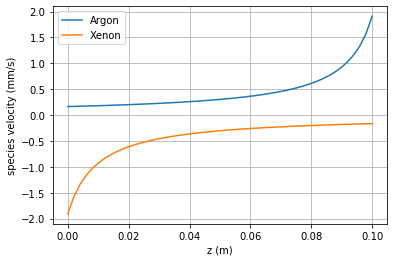

At t=75 hours:
	Argon velocity (m/s) at z=L: 1.909 mm/s
	Xenon velocity (m/s) at z=L: -0.1645 mm/s



In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

z  = np.linspace(0,L)
xa = np.linspace(xa0,xaL)  # mole fraction profiles are linear

# calculate species velocity.  Note that this is equal to the species
# diffusion velocity since there is no molar averaged velocity
Na = -c * Dab / L * (xaL-xa0)
va =  Na / (c * xa)
vb = -Na / (c*(1-xa))

plt.plot(z,va*1e3,label='Argon')
plt.plot(z,vb*1e3,label='Xenon')
plt.xlabel('z (m)') 
plt.ylabel('species velocity (mm/s)')
plt.legend() 
plt.grid()
# plt.savefig('specvel.png')
plt.show()

print('At t={:.0f} hours:'.format(t/3600))
print('\tArgon velocity (m/s) at z=L: {:.3f} mm/s'.format(va[-1]*1e3))
print('\tXenon velocity (m/s) at z=L: {:.4f} mm/s\n'.format(vb[-1]*1e3))

# Part 4

At $t=100$ hours, we want the molar averaged velocity:
$$v_{M} = \frac{N}{c}$$ 
but since $N=0$ (equimolar counter-diffusion)
\begin{equation}
    \boxed{v_{M}=0}.
\end{equation}

# Part 5

At $t=75$ hours, we want to plot the mass-averaged velocity, $v$ and report its value at $z=L$.

The molar averaged velocity is:
\begin{align}
    v &= \omega_{A} v_{A} + ( 1 - \omega_{A} ) v_{B} \\
      &= \omega_{A} \frac{N_{A}}{c_{A}} + ( 1 - \omega_{A} ) \frac{N_{B}}{c_{B}}
\end{align}
and
$
    \omega_{i}=\frac{x_{i}M_{i}}{M}
$
with
$
    M=\sum_{i=1}^{C}x_{i}M_{i}.
$
For the binary mixture we have here, this simplifies to
\begin{equation}
    \omega_{A}=\frac{x_{A}M_{A}}{x_{A}M_{A}+(1-x_{A})M_{B}}
\end{equation}

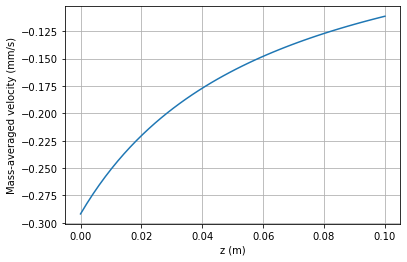

mass-averaged velocity at z=L: -1.11e-01 mm/s



In [5]:
# calculate the mass-averaged velocity
M  = [ 40, 131 ]  # molecular weight of argon, xenon, g/mol
wa = xa * M[0] / (xa*M[0]+ (1-xa)*M[1])
v  = wa*Na/(c*xa) + (1-wa)*(-Na/(c*(1-xa)))

plt.plot(z,v*1e3)
plt.xlabel('z (m)') 
plt.ylabel('Mass-averaged velocity (mm/s)')
plt.grid()
plt.show()

print('mass-averaged velocity at z=L: {:.2e} mm/s\n'.format(v[-1]*1e3))